In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

**=== Loading the EEG Dataset ===**

In [15]:
#  Load dataset
EEG = pd.read_csv("sample_data/BEED_data.csv")


# Display first 5 rows
EEG.head()

,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,Channel11,Channel12,Channel13,Channel14,Channel15,Channel16,Label
0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
1,4,7,18,25,28,27,20,10,-10,-18,-20,-16,13,32,12,10,0
2,87,114,120,106,76,54,28,5,-19,-49,-85,-102,-100,-89,-61,-21,0
3,-131,-133,-140,-131,-123,-108,-58,-51,-70,-77,-76,-76,-73,-57,-40,-14,0
4,68,104,73,34,-12,-26,-38,-36,-67,-88,-25,31,18,-4,6,-29,0


In [20]:
for i in range(1, 17):
  # Convert all channel columns to numeric
    EEG[f"Channel{i}"] = pd.to_numeric(EEG[f"Channel{i}"], errors='coerce')

**=== EEG Dataset Overview ===**

In [16]:
# Dataset information
EEG.info()

# Descriptive statistics for numeric columns
EEG.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Channel1   8001 non-null   object
 1   Channel2   8001 non-null   object
 2   Channel3   8001 non-null   object
 3   Channel4   8001 non-null   object
 4   Channel5   8001 non-null   object
 5   Channel6   8001 non-null   object
 6   Channel7   8001 non-null   object
 7   Channel8   8001 non-null   object
 8   Channel9   8001 non-null   object
 9   Channel10  8001 non-null   object
 10  Channel11  8001 non-null   object
 11  Channel12  8001 non-null   object
 12  Channel13  8001 non-null   object
 13  Channel14  8001 non-null   object
 14  Channel15  8001 non-null   object
 15  Channel16  8001 non-null   object
 16  Label      8001 non-null   object
dtypes: object(17)
memory usage: 1.0+ MB


,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,Channel11,Channel12,Channel13,Channel14,Channel15,Channel16,Label
count,8001,8001,8001,8001,8001,8001,8001,8001,8001,8001,8001,8001,8001,8001,8001,8001,8001
unique,334,349,340,346,341,341,351,351,353,352,344,344,342,336,343,341,5
top,-1,1,-1,-1,-5,1,-1,-1,-1,1,1,-1,5,-1,-2,1,0
freq,382,337,434,304,237,325,377,443,350,298,415,311,236,286,340,506,2000


In [21]:
five_num_summary = EEG.describe().loc[['min','25%','50%','75%','max']]
five_num_summary


,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,Channel11,Channel12,Channel13,Channel14,Channel15,Channel16
min,-281.0,-255.0,-255.0,-257.0,-264.0,-277.0,-277.0,-260.0,-290.0,-302.0,-276.0,-306.0,-288.0,-290.0,-323.0,-317.0
25%,-7.0,-7.0,-7.0,-10.0,-10.0,-8.0,-8.0,-7.0,-7.0,-8.0,-8.0,-11.0,-10.0,-8.0,-9.0,-6.0
50%,0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-2.0,0.0,0.0,-2.0,-1.0
75%,8.0,8.0,5.0,7.0,10.0,8.0,6.0,5.0,8.0,8.0,5.0,7.0,10.0,9.0,5.0,4.0
max,252.0,261.0,238.0,246.0,249.0,245.0,220.0,271.0,280.0,251.0,262.0,283.0,296.0,291.0,251.0,270.0


**=== Missing Data Analysis ===**

In [22]:
# Count missing values per column
missing_count = EEG.isnull().sum()

# Percentage of missing values
missing_percent = (missing_count / len(EEG)) * 100

# Combine results into one table
missing_table = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent
})

missing_table


,Missing Values,Percentage (%)
Channel1,1,0.012498
Channel2,1,0.012498
Channel3,1,0.012498
Channel4,1,0.012498
Channel5,1,0.012498
Channel6,1,0.012498
Channel7,1,0.012498
Channel8,1,0.012498
Channel9,1,0.012498
Channel10,1,0.012498


**=== Class Distribution ===**

In [23]:
# Count records per class
class_distribution = EEG['Label'].value_counts()

# Convert to DataFrame for better display
class_distribution_table = pd.DataFrame({
    'Class': class_distribution.index,
    'Count': class_distribution.values
})

class_distribution_table


,Class,Count
0,0,2000
1,2,2000
2,1,2000
3,3,2000
4,y,1


**=== Distribution of Numeric Attributes ===**

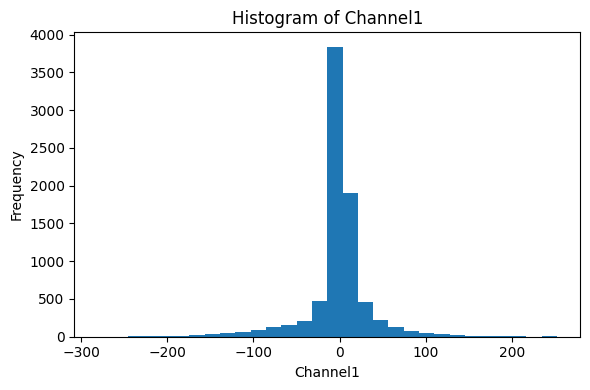

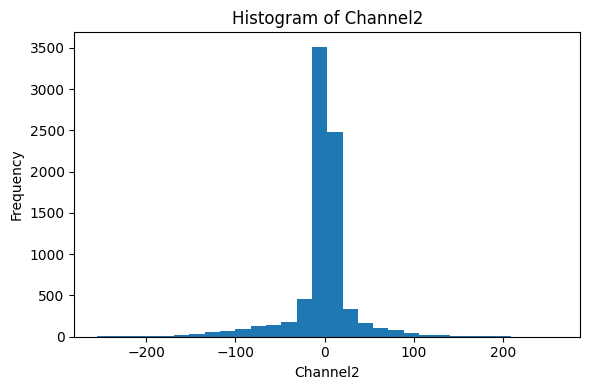

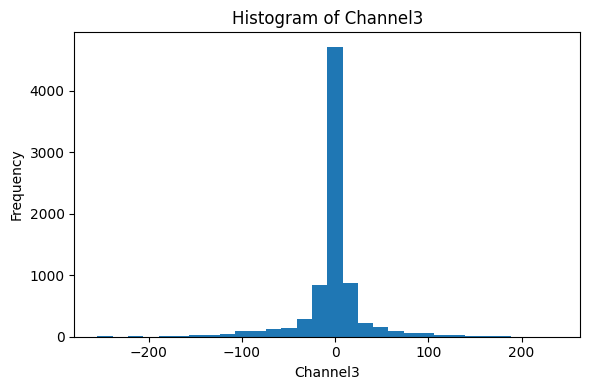

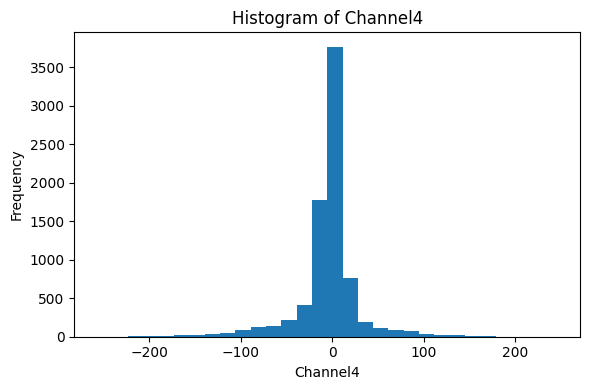

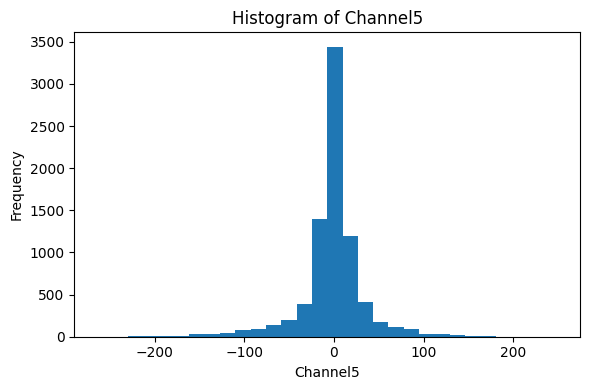

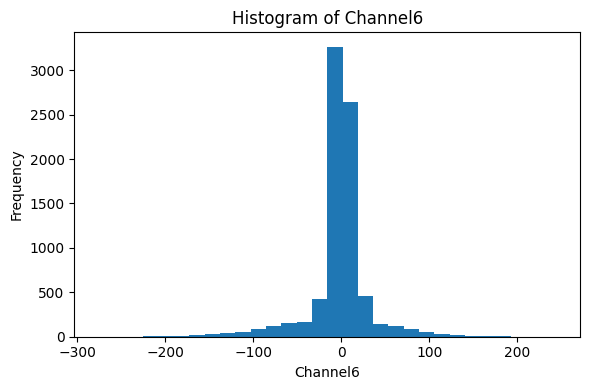

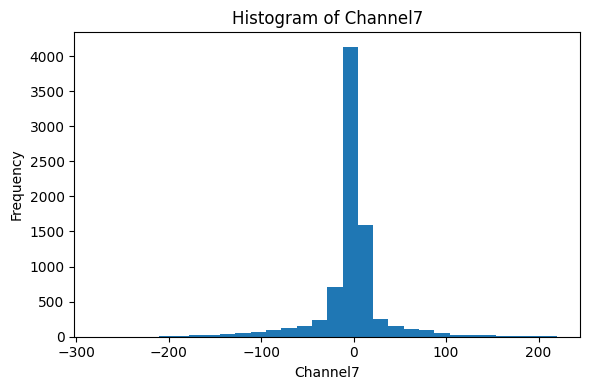

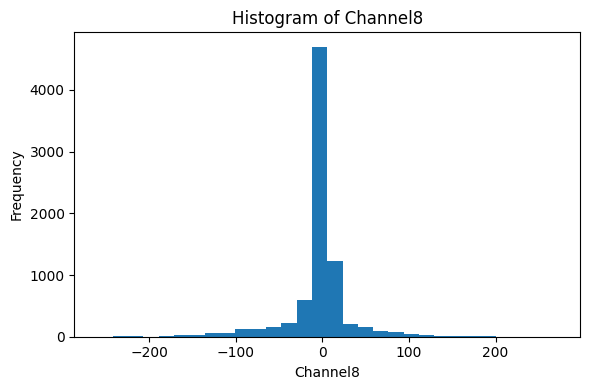

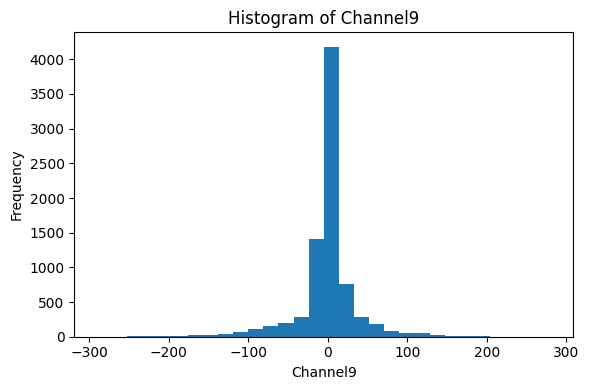

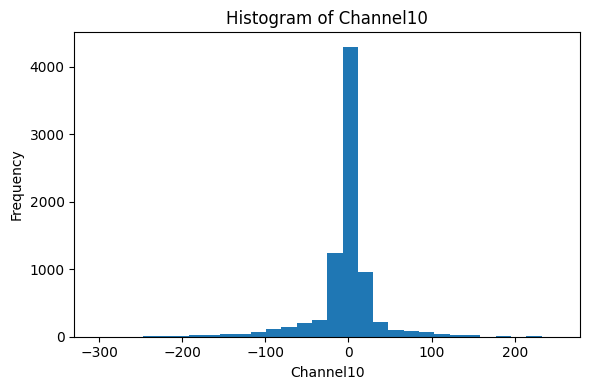

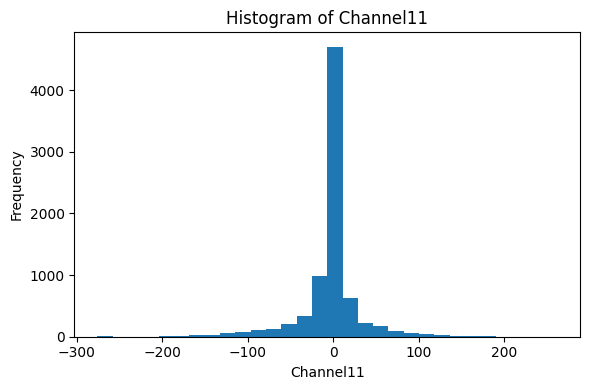

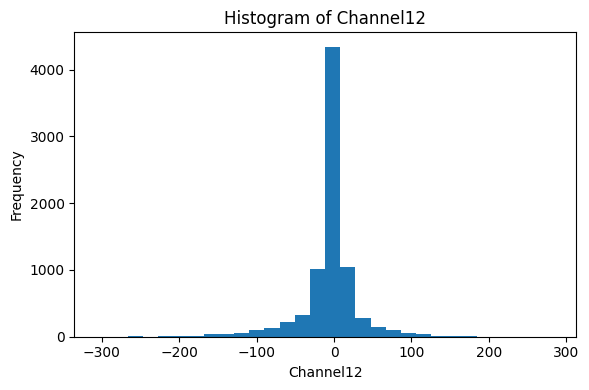

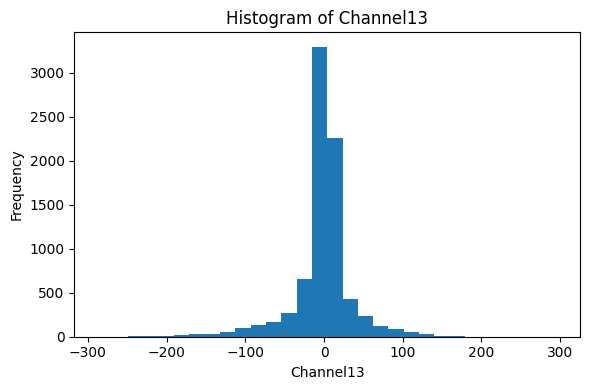

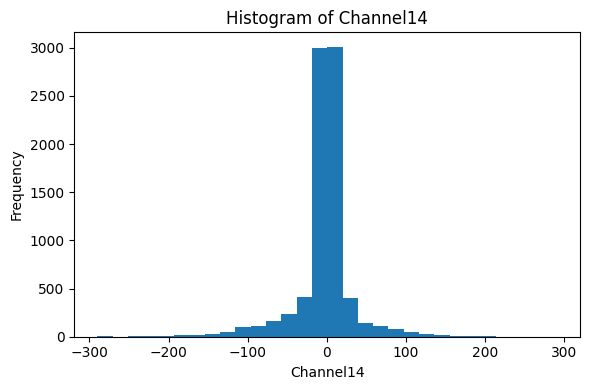

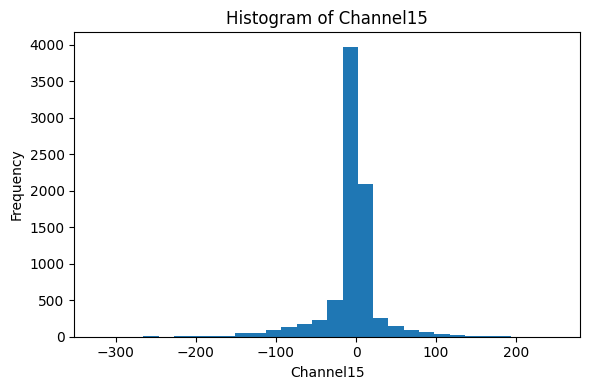

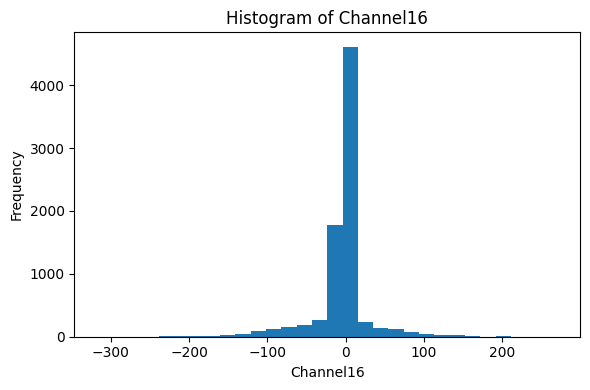

In [24]:
# Select numeric columns
num_cols = EEG.select_dtypes(include=['number']).columns.tolist()

# Plot each numeric column in a separate histogram
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(EEG[col].dropna(), bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()








**Description of the Plots**

The histograms provide a visual representation of the distribution of values for each numeric attribute (Channel 1 - Channel 16). The horizontal axis (x-axis) displays the range of values observed for each feature, while the vertical axis (y-axis) shows the frequency of records within specific intervals (bins).

From the graphs, it is evident that most features are centered around zero, with values tapering off toward both extremes. This pattern suggests that the data approximate a normal distribution, although some features exhibit skewness and long tails, indicating the presence of outliers. The histogram of the target variable (Label) demonstrates that the dataset is evenly distributed across the four classes (0, 1, 2, 3), confirming a balanced classification problem.

**Importance for Preprocessing**

Analyzing histograms plays a crucial role in preparing the dataset for machine learning:

Outlier Detection: The long tails in several features highlight potential outliers. These extreme values may distort the learning process and require handling through removal, transformation, or capping.

Distribution Shape: Certain features exhibit skewness, which may necessitate transformations (e.g., logarithmic or Box-Cox) to approximate normality. Many machine learning algorithms perform better with normally distributed inputs.

Feature Scaling: The ranges of values differ across features, as highlighted by the histograms. Standardization or normalization is required to ensure all attributes contribute proportionally to model training.

Feature Relevance: Features that show very little variation (nearly flat histograms) provide minimal discriminatory information. Such attributes may be excluded during feature selection to improve efficiency and reduce noise.




**=== Bar Chart of Class Distribution ===**

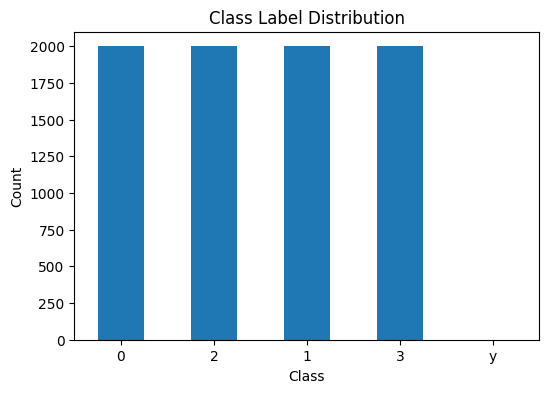

In [25]:
# Create a new figure with size 6x4 inches
plt.figure(figsize=(6,4))
# Count how many samples belong to each class in the "Label" column
# and create a bar plot of these counts
EEG["Label"].value_counts().plot(kind="bar")
# Add a title to the plot
plt.title("Class Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
# Keep the x-axis labels horizontal for readability
plt.xticks(rotation=0)
plt.show()

**Description of the Plot:**

The bar chart illustrates the frequency of records for each class in the target variable (Label). Each bar corresponds to one of the four classes (0, 1, 2, and 3), and the height of the bar represents the number of records in that class.

**What the Plot Shows:**

The visualization provides a clear overview of how the dataset is distributed across the four classes. In this case, all bars are of approximately equal height, indicating that the dataset is well-balanced among the classes. This balance suggests that no single class dominates the dataset, which reduces the risk of model bias toward a majority class.

**Why This is Important for Preprocessing:**

Examining the class distribution is a critical preprocessing step in classification tasks. A balanced dataset, as shown here, is advantageous because it ensures that the machine learning model will have sufficient training examples for each class. In situations where imbalance is present, models often struggle to correctly classify minority classes. However, since the dataset appears balanced across all four categories, advanced resampling or weighting techniques may not be necessary, and the focus of preprocessing can instead shift toward feature scaling, outlier handling, and noise reduction.

**=== Count Records per Class ===**

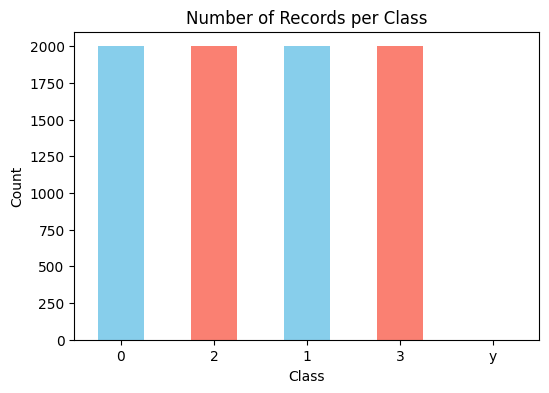

In [26]:
# Count records per class
class_counts = EEG["Label"].value_counts()

# Bar chart
plt.figure(figsize=(6,4))
# Plot the class counts as a bar chart, using two colors for the bars
class_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Number of Records per Class")
plt.xlabel("Class")
plt.ylabel("Count")
# Keep class labels horizontal
plt.xticks(rotation=0)
plt.show()

**What the Plot Shows**

The bar chart presents the number of records that belong to each class in the target variable (Label). Each bar corresponds to one of the four classes (0, 1, 2, and 3), and the height of the bar shows how many records are in that group. In this case, the bars are of almost equal height, which means the dataset is well-balanced across the four classes. This indicates that each class has a similar number of records.

**Why This is Important for Preprocessing**

Understanding how many records belong to each class is an important step before building a classification model. If one class had far more records than the others (class imbalance), the model could become biased toward predicting the majority class and perform poorly on minority classes. Since this dataset shows a balanced class distribution, the risk of bias is reduced, and no special resampling or class weighting is immediately necessary. Instead, preprocessing efforts can focus more on tasks such as feature scaling, outlier handling, and noise reduction, which will help improve model performance.

**=== Bivariate Scatter Plot of Channel 1 and Channel 1 ===**

In [28]:
# Convert Label column to integers
EEG["Label"] = pd.to_numeric(EEG["Label"], errors="coerce")

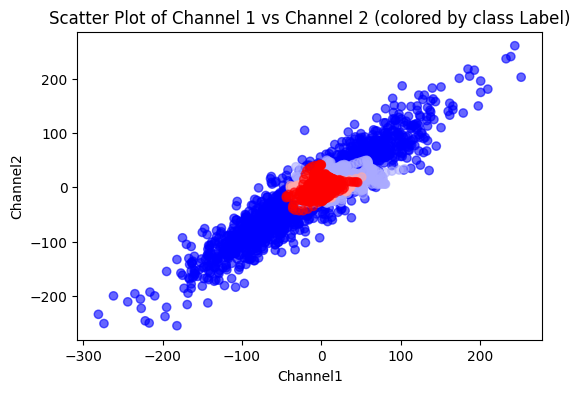

In [29]:
# Scatter plot of two features (Channel 1 and Channel 2), colored by class label (Label)
plt.figure(figsize=(6,4))
# Scatter plot:
# - x-axis: values from Channel1
# - y-axis: values from Channel2
# - c: color each point based on its class label
# - cmap: color map "bwr" (blue for one class, red for the other)
# - alpha: make points slightly transparent (0.6)
plt.scatter(EEG["Channel1"], EEG["Channel2"], c=EEG["Label"], cmap="bwr", alpha=0.6)
# -title for the plot
plt.title("Scatter Plot of Channel 1 vs Channel 2 (colored by class Label)")
plt.xlabel("Channel1")
plt.ylabel("Channel2")
plt.show()

**What the Plot Shows:**

The scatter plot illustrates the relationship between the two numeric features Channel 1 and Channel 2. Each point represents one record, with the color indicating its class label (Label = 0 in blue, Label = 1 in red). The points form an upward-sloping pattern, which indicates a positive correlation between Channel 1 and Channel 2 (as values of Channel 1 increase, values of Channel 2 also tend to increase).

In terms of class separation, the plot shows that the two classes overlap substantially in this feature space. While class 1 points (red) are somewhat concentrated around the center, class 0 points (blue) are more widely spread, covering a much larger range. This overlap suggests that Channel 1 and Channel 2 alone may not be sufficient for perfect classification.


**Why This is Important for Preprocessing:**

- **Correlation Analysis:** The positive correlation between Channel 1 and Channel 2 indicates potential redundancy. Highly correlated features may be reduced using dimensionality reduction techniques (e.g., PCA) to simplify the dataset without losing much information.

- **Class Separability:** The visible overlap between classes suggests that additional features or transformations will be required for the model to distinguish between them effectively.

- **Scaling Needs:** The wide spread of data values (ranging from approximately –300 to +200) highlights the importance of applying feature scaling (standardization or normalization) before model training to ensure all features contribute fairly.

- **Outlier Detection:** A few points lie farther from the main cluster, which may represent outliers. Detecting and treating such values can prevent them from negatively influencing the model.

**===PreProcessing===**

***Missing Value:***


In this preprocessing step, we verified that there were no missing values in the EEG dataset.

In [30]:
# Check for missing values
# Count the number of missing (null) values in each column of the dataset
missing = EEG.isnull().sum()

print("Missing values per column:\n", missing)
# Check if the total number of missing values is zero
if missing.sum() == 0:
    print("\n No missing values detected.")
else:
    print("\n Dataset contains missing values")



Missing values per column:
 Channel1     1
Channel2     1
Channel3     1
Channel4     1
Channel5     1
Channel6     1
Channel7     1
Channel8     1
Channel9     1
Channel10    1
Channel11    1
Channel12    1
Channel13    1
Channel14    1
Channel15    1
Channel16    1
Label        1
dtype: int64

 Dataset contains missing values


**=== Outlier Detecting & Handling (Noise removal: Binning ) ==**
**What This Step Does:**

We detect extreme values in the EEG feature columns using the IQR rule, then smooth the signal with median binning.

For each channel (columns starting with “Channel” or “X”, excluding the label), we compute Q1, Q3, and IQR, and define Tukey limits: [Q1 − 1.5×IQR, Q3 + 1.5×IQR].

We apply bin median smoothing with a bin size of 10 rows, replacing each bin’s values by its median to damp spikes while keeping all rows.

**Why This Is Important:**

Outliers and sudden spikes distort EEG statistics and can degrade model training. Using the IQR rule together with median binning reduces noise without deleting rows, yielding cleaner, more stable signals that better represent the underlying pattern.

**Verification:**

Rows with any outlier (before & after): 36.162% → 32.375% (2,893 → 2,590 rows).

Changed cells due to smoothing: 91.49% (expected with binning since values within each bin are replaced by the median).

Rows removed: 0 (all data retained).

Detecting Outliers Step:



In [31]:

#  1) Select the feature columns (those starting with "Channel"), excluding the target column 'y'
features = [c for c in EEG.columns if (c.lower().startswith("channel") ) and c.lower() != "y"]

# 2) Define a helper function to calculate IQR-based lower and upper bounds
# (the rule: 1.5 * IQR)
IQR_MULT = 1.5
def iqr_bounds(s, mult=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    return (q1 - mult*iqr, q3 + mult*iqr)

# 3) Create per-column outlier masks
# (Compute the IQR bounds for each column and flag values outside this range)
masks = {}
for col in features:
    low, high = iqr_bounds(EEG[col], IQR_MULT)
    masks[col] = (EEG[col] < low) | (EEG[col] > high)

out = pd.DataFrame(masks, index=EEG.index)

# 4) Summarize outlier counts and percentages per column
n = len(EEG)
col_counts = out.sum().astype(int)
summary = (
    pd.DataFrame({
        "Outliers": col_counts,
        "Percent%": (col_counts / n * 100).round(3)
    })
    .sort_values("Outliers", ascending=False)
)

# 5) Calculate overall number and percentage of rows containing at least one outlier
overall = out.any(axis=1).sum()
overall_pct = overall / n * 100

print(f"Rows: {n:,}")
print(f"Rows with any outlier: {overall:,}  ({overall_pct:.3f}%)\n")
display(summary)


Rows: 8,001
Rows with any outlier: 2,893  (36.158%)



,Outliers,Percent%
Channel11,1680,20.997
Channel9,1613,20.160
Channel16,1574,19.673
Channel3,1564,19.548
Channel1,1550,19.373
Channel8,1519,18.985
Channel7,1444,18.048
Channel15,1406,17.573
Channel2,1367,17.085
Channel12,1336,16.698


In [32]:
# Handling step:
#  Smooth the data using binning (median)
EEG_smooth = EEG.copy()
bin_size = 10  # Define number of rows per bin (can be adjusted as needed)

# For each feature column, replace values with the median of their bin
for col in features:
    EEG_smooth[col] = EEG[col].groupby(EEG.index // bin_size).transform('median')


In [33]:
# 1) Compute IQR bounds from the original dataset (once per column)
orig_bounds = {}
for col in features:
    low, high = iqr_bounds(EEG[col], IQR_MULT)  # Using the same helper function defined earlier
    orig_bounds[col] = (low, high)

# 2) Count how many rows contain outliers in the original dataset (based on these fixed bounds)
masks_before = [(EEG[c] < orig_bounds[c][0]) | (EEG[c] > orig_bounds[c][1]) for c in features]
overall_before_fixed = pd.concat(masks_before, axis=1).any(axis=1).sum()

# 3) Apply the same original IQR bounds to the smoothed dataset (EEG_smooth)
masks_after  = [(EEG_smooth[c] < orig_bounds[c][0]) | (EEG_smooth[c] > orig_bounds[c][1]) for c in features]
overall_after_fixed = pd.concat(masks_after, axis=1).any(axis=1).sum()

# Print comparison: number and percentage of rows with outliers before vs after smoothing
print(f"Rows with any outlier (fixed original bounds):")
print(f"Before: {overall_before_fixed}  ({overall_before_fixed/len(EEG)*100:.3f}%)")
print(f"After : {overall_after_fixed}   ({overall_after_fixed/len(EEG)*100:.3f}%)")


Rows with any outlier (fixed original bounds):
Before: 2893  (36.158%)
After : 2560   (31.996%)


In [34]:
# === PREPROCESSED SNAPSHOT (after median binning) ===
pre_head = EEG_smooth.head(100)
pre_stats = EEG_smooth[features].describe().T

EEG_smooth.to_csv("BEED_preprocessed_medianbin10.csv", index=False)
pre_head.to_csv("BEED_pre_head100.csv", index=False)
pre_stats.to_csv("BEED_pre_stats.csv")

print("PRE snapshot saved:",
      "\n- BEED_preprocessed_medianbin10.csv",
      "\n- BEED_pre_head100.csv",
      "\n- BEED_pre_stats.csv")

PRE snapshot saved: 
- BEED_preprocessed_medianbin10.csv 
- BEED_pre_head100.csv 
- BEED_pre_stats.csv


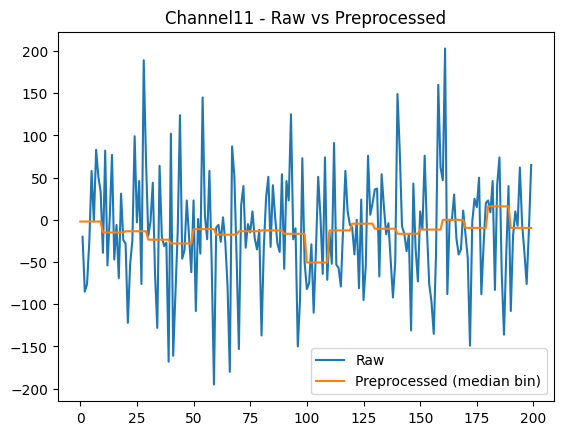

In [35]:

col = "Channel11"  # مثال لقناة فيها Outliers
plt.figure()
plt.plot(EEG[col].values[:200], label="Raw")
plt.plot(EEG_smooth[col].values[:200], label="Preprocessed (median bin)")
plt.title(f"{col} - Raw vs Preprocessed")
plt.legend()
plt.show()


***Normalization***:

Since all features (channel–channel16) vary widely in range (from -300 to +300), Min-Max Normalization was applied to rescale all feature values between 0 and 1.

**Why applied it**: The original EEG channel values had a very wide and varying range (from approximately -300 to +300). This was done to ensure that no single channel would dominate the model's learning process simply because of its larger scale, making all features contribute equally.

**How and on which attributes:** It was applied using a MinMaxScaler which rescales data, specifically to the numerical columns Channel1 through Channel16 (all columns), transforming their values to a fixed range between 0 and 1.

before normalization:

In [36]:
# Display first 5 rows
EEG.head()

,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,Channel11,Channel12,Channel13,Channel14,Channel15,Channel16,Label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,7.0,18.0,25.0,28.0,27.0,20.0,10.0,-10.0,-18.0,-20.0,-16.0,13.0,32.0,12.0,10.0,0.0
2,87.0,114.0,120.0,106.0,76.0,54.0,28.0,5.0,-19.0,-49.0,-85.0,-102.0,-100.0,-89.0,-61.0,-21.0,0.0
3,-131.0,-133.0,-140.0,-131.0,-123.0,-108.0,-58.0,-51.0,-70.0,-77.0,-76.0,-76.0,-73.0,-57.0,-40.0,-14.0,0.0
4,68.0,104.0,73.0,34.0,-12.0,-26.0,-38.0,-36.0,-67.0,-88.0,-25.0,31.0,18.0,-4.0,6.0,-29.0,0.0


Applying Normalization:

In [37]:

#apply normalization to only the actual channel columns
scaler = MinMaxScaler()
features = [f'Channel{i}' for i in range(1, 17)]
EEG[features] = scaler.fit_transform(EEG[features])

print("First 5 rows after preprocessing:")
display(EEG.head())



First 5 rows after preprocessing:


,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,Channel11,Channel12,Channel13,Channel14,Channel15,Channel16,Label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.534709,0.507752,0.553753,0.560636,0.569201,0.582375,0.597586,0.508475,0.491228,0.513562,0.475836,0.492360,0.515411,0.554217,0.583624,0.557070,0.0
2,0.690432,0.715116,0.760649,0.721670,0.662768,0.634100,0.613682,0.499058,0.475439,0.457505,0.355019,0.346350,0.321918,0.345955,0.456446,0.504259,0.0
3,0.281426,0.236434,0.233266,0.250497,0.274854,0.323755,0.440644,0.393597,0.385965,0.406872,0.371747,0.390492,0.368151,0.401033,0.493031,0.516184,0.0
4,0.654784,0.695736,0.665314,0.578529,0.491228,0.480843,0.480885,0.421846,0.391228,0.386980,0.466543,0.572156,0.523973,0.492255,0.573171,0.490630,0.0


 **Variance Threshold Feature Selection=**

**Why applied it:** This technique was applied to automatically identify and remove EEG channels with very low signal variance. After normalization, some channels may contain little to no useful variation, representing inactive brain regions or redundant signals. Removing these low-variance features helps reduce dataset dimensionality and computational complexity while focusing on the most informative channels for machine learning.

**How and on which attributes:** It was implemented using Scikit-learn's VarianceThreshold with a data-driven threshold calculated as 1.1 times the minimum observed variance across all channels. The method was applied to all **Channel1 through Channel16** attributes, successfully identifying and removing the 4 lowest-variance channels while retaining the 12 most variable and informative EEG channels for subsequent analysis.

In [38]:
# Select only the EEG channel features
features = [f'Channel{i}' for i in range(1, 17)]
X = EEG[features]

# First, check the actual variance of the data
variances = X.var()
print("Variance of each EEG channel:")
for i, var in enumerate(variances, 1):
    print(f"Channel{i}: {var:.6f}")

print(f"\nMinimum variance: {variances.min():.6f}")
print(f"Maximum variance: {variances.max():.6f}")
print(f"Average variance: {variances.mean():.6f}")

# Use a threshold based on variance
threshold = variances.min() * 1.1  # Slightly above minimum variance

# Apply Variance Threshold
selector = VarianceThreshold(threshold=threshold)
X_new = selector.fit_transform(X)

# Display the selected features
selected_features = [features[i] for i in range(len(features)) if selector.get_support()[i]]
print(f"\nSelected Features after Variance Threshold:")
print(f"Keeping {len(selected_features)} out of {len(features)} channels")
print("Selected channels:", selected_features)

# Create new dataset with selected features + label
EEG_selected = EEG[selected_features + ['Label']]

print(f"\nSelected dataset shape: {EEG_selected.shape}")
print("\nFirst 5 rows of selected dataset:")
print(EEG_selected.head())


Variance of each EEG channel:
Channel1: 0.004773
Channel2: 0.004897
Channel3: 0.005274
Channel4: 0.005204
Channel5: 0.005378
Channel6: 0.004837
Channel7: 0.005352
Channel8: 0.004731
Channel9: 0.004470
Channel10: 0.004608
Channel11: 0.004818
Channel12: 0.004047
Channel13: 0.004266
Channel14: 0.003977
Channel15: 0.003987
Channel16: 0.003747

Minimum variance: 0.003747
Maximum variance: 0.005378
Average variance: 0.004648

Selected Features after Variance Threshold:
Keeping 12 out of 16 channels
Selected channels: ['Channel1', 'Channel2', 'Channel3', 'Channel4', 'Channel5', 'Channel6', 'Channel7', 'Channel8', 'Channel9', 'Channel10', 'Channel11', 'Channel13']

Selected dataset shape: (8001, 13)

First 5 rows of selected dataset:
   Channel1  Channel2  Channel3  Channel4  Channel5  Channel6  Channel7  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  0.534709  0.507752  0.553753  0.560636  0.569201  0.582375  0.597586   
2  0.690432  0.715116  0.760649  0.7216

 Saving a Copy preprocessed EEG data to

In [39]:
# Save the preprocessed EEG data to CSV file
EEG_selected.to_csv('EEG_preprocessed.csv', index=False)
